In [9]:
import numpy as np
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from matplotlib import pyplot as plt

X, y = make_circles(100, factor=.1, noise=.1)

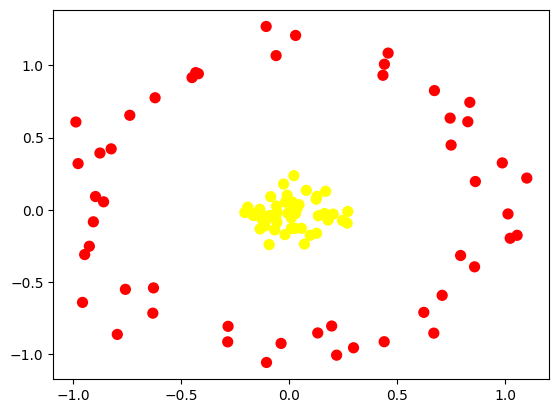

In [10]:
plt.scatter(X[:, 0], X[:, 1], c = y, s=50, cmap='autumn')

In [11]:
def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [12]:
model_linear = SVC(kernel='linear')
model_linear.fit(X, y)


SVC(kernel='linear')

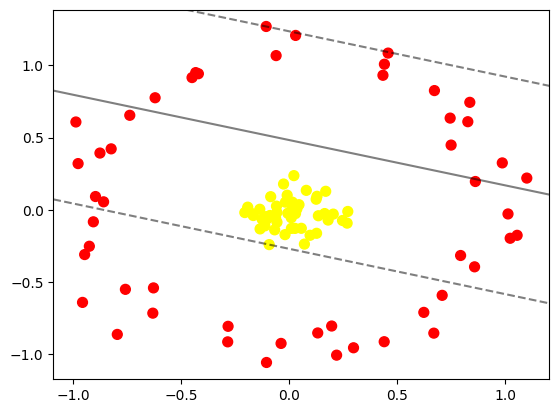

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y, s = 50, cmap='autumn')
plot_svc_decision_function(model_linear, plot_support=False)

In [14]:
model_sigmoid = SVC(kernel='sigmoid')
model_sigmoid.fit(X, y)

SVC(kernel='sigmoid')

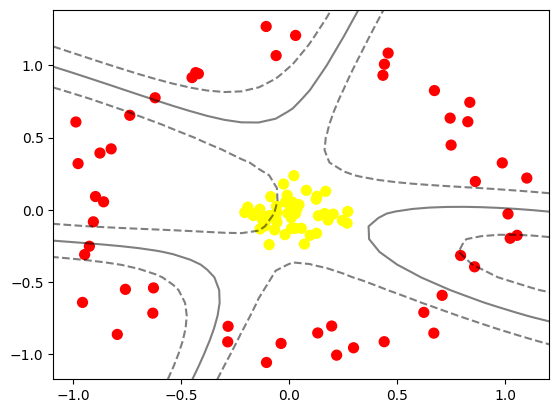

In [15]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model_sigmoid, plot_support=False)

In [16]:
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X, y)

SVC()

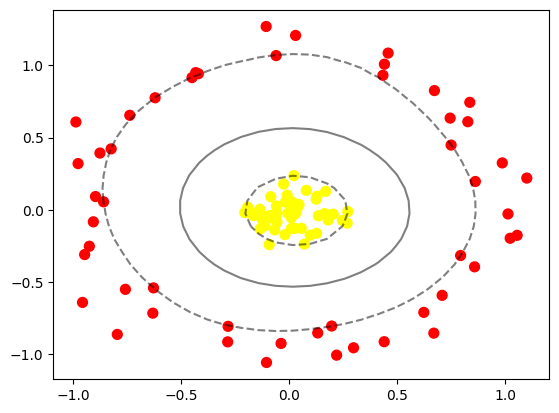

In [17]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model_rbf, plot_support=False)

In [18]:
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

In [19]:
X, y = make_classification (n_samples= 1000 , n_features= 2, n_redundant= 0, n_informative= 2, random_state= 1, n_clusters_per_class= 1)


In [20]:
C = 1.0 # параметр регуляризации SVM
linear_svc = svm. SVC (kernel= 'linear' , C=C ).fit (X, y)
# Создаем экземпляр SVM и обучаем модель с использованием RBF- ядро
rbf_svc = svm. SVC (kernel= 'rbf' , gamma= 0.7 , C=C ).fit (X, y)
# Создаем экземпляр SVM и обучаем модель с использованием полиномиального ядра
poly_svc = svm. SVC (kernel= 'poly' , degree= 2, C=C ).fit (X, y)
# Создаем экземпляр SVM и обучаем модель с использованием сигмоидного ядра
sig_svc = svm. SVC (kernel= 'sigmoid' , C=C ).fit (X, y)
# оцениваем качество моделей
print ('Accuracy of linear kernel:' , accuracy_score (y, linear_svc. predict (X)))
print ('Accuracy of polynomial kernel:' , accuracy_score (y, poly_svc. predict (X)))
print ('Accuracy of RBF kernel:' , accuracy_score (y, rbf_svc. predict (X)))
print ('Accuracy of sigmoid kernel:' , accuracy_score (y, sig_svc. predict (X)))


Accuracy of linear kernel: 0.898
Accuracy of polynomial kernel: 0.924
Accuracy of RBF kernel: 0.922
Accuracy of sigmoid kernel: 0.815


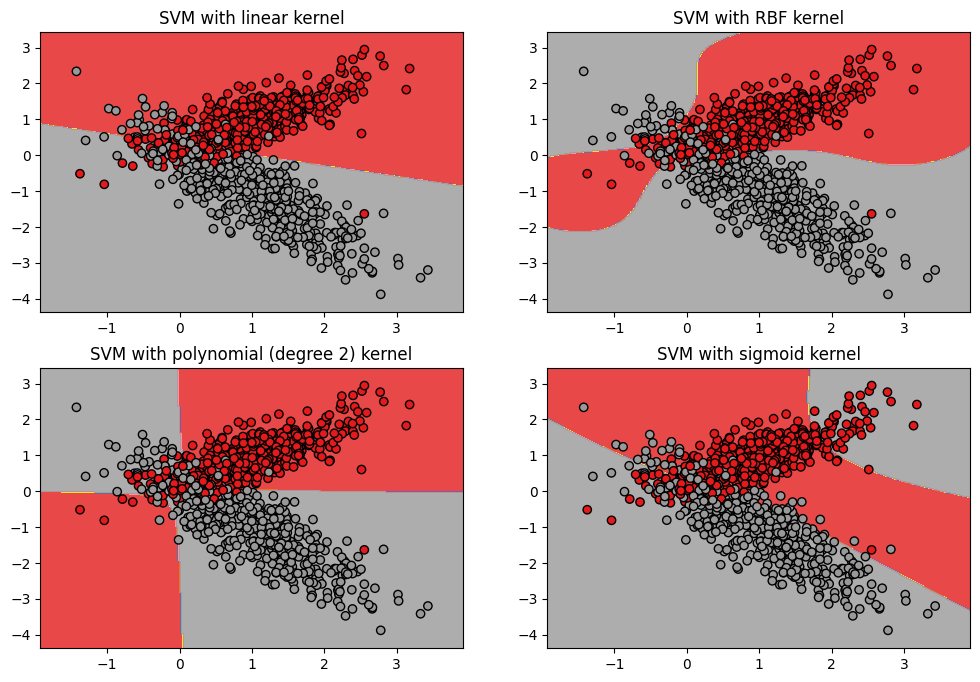

In [22]:
# Создаем сетку для графиков
h = 0.02 # шаг в сетке
x_min, x_max = X[:, 0].min () - 0.5 , X[:, 0].max () + 0.5
y_min, y_max = X[:, 1].min () - 0.5 , X[:, 1].max () + 0.5
xx, yy = np. meshgrid (np. arange (x_min, x_max, h), np. arange (y_min, y_max, h))
# Заголовки графиков
titles = ['SVM with linear kernel' ,
'SVM with RBF kernel' ,
'SVM with polynomial (degree 2) kernel' ,
'SVM with sigmoid kernel' ]
# Создаем график
plt. figure (figsize= (12 , 8))
for i, clf in enumerate (( linear_svc, rbf_svc, poly_svc, sig_svc )) :
    # Рисуем границы принятия решений на графике
    plt. subplot (2, 2, i+ 1)
    Z = clf. predict (np.c_ [xx. ravel () , yy. ravel ()])
    Z = Z. reshape (xx.shape )
    plt. contourf (xx, yy, Z, cmap=plt.cm.Set1, alpha= 0.8 )
    # Рисуем точки данных
    plt. scatter (X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor= 'k' )
    plt. title (titles [i])
plt. show ()
